<b>Coding2:Random Forest for Image Approximation</b>

<b>(A)load the img of Mona Lisa</b>

In [207]:
import PIL 
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd

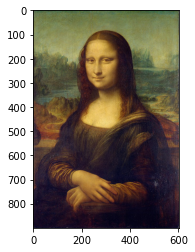

In [208]:
urllib.request.urlretrieve("http://tinyurl.com/mona-lisa-small", "Mona.png")
img = PIL.Image.open("Mona.png")
plt.imshow(img)

#img.show()

<b>B: Preprocessing the input</b>

In [209]:
import random

In [210]:
width, height = img.size #get the width and height of the image
print(width) #604
print(height)#900

604
900


In [211]:
all_coord = []
for i in range(height):
    for j in range(width):
        all_coord.append((j,i))

training = random.choices(all_coord, k=5000) #get random 5000 coordinates from the img

In [212]:
train_color = []
for coord in training:
    rgb_data = img.getpixel(coord)
    r = rgb_data[0]/256   
    g = rgb_data[1]/256   
    b = rgb_data[2]/256
    train_color.append((r,g,b))     #train_color
   

In [213]:
train_coord = []
for coord in training:
    x = coord[0]/width
    y = coord[1]/height
    train_coord.append((x,y))      #train_coord

<b>C: Preprocessing output</b>

In [ ]:
#I will regress all three values at once, so that my function in (D) can map (x,y) 
# coordinates to (r,g,b), whose intensity has been modified by /256 </b>

<b>D: </b>

In [214]:
from sklearn.ensemble import RandomForestRegressor

In [215]:
reg = RandomForestRegressor()

reg.fit(train_coord, train_color)

RandomForestRegressor()

In [216]:
test_coord = []
for coord in all_coord:
    x = coord[0]/width
    y = coord[1]/height
    test_coord.append((x,y))

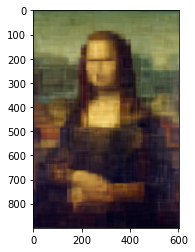

In [217]:
pred_color = reg.predict(test_coord)
pred_color = pred_color.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_color)

<b> E </b>

<b> i: For 1 decision tree, let max_depth = 1</b>

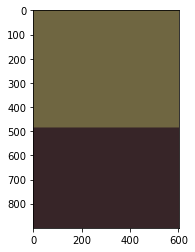

In [218]:
reg1 = RandomForestRegressor(n_estimators=1, max_depth=1)
reg1.fit(train_coord, train_color)
pred_color1 = reg1.predict(test_coord)
pred_color1 = pred_color1.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_color1)


<b>i: For 1 decision tree, let max_depth = 2 </b>

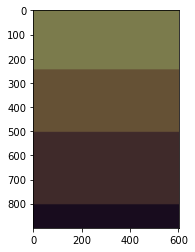

In [169]:
reg2 = RandomForestRegressor(n_estimators=1, max_depth=2)
reg2.fit(train_coord, train_color)
pred_color2 = reg2.predict(test_coord)
pred_color2 = pred_color2.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_color2)

<b>i: For 1 decision tree, let max_depth = 3 </b>

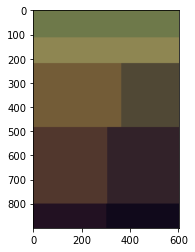

In [170]:
reg3 = RandomForestRegressor(n_estimators=1, max_depth=3)
reg3.fit(train_coord, train_color)
pred_color3 = reg3.predict(test_coord)
pred_color3 = pred_color3.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_color3)

<b>i: For 1 decison tree, let max_depth = 5</b>

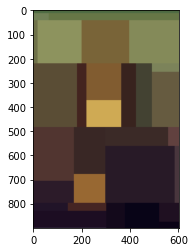

In [171]:
reg4 = RandomForestRegressor(n_estimators=1, max_depth=5)
reg4.fit(train_coord, train_color)
pred_color4 = reg4.predict(test_coord)
pred_color4 = pred_color4.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_color4)

<b>i: For 1 decision tree, let max_depth = 10 </b>

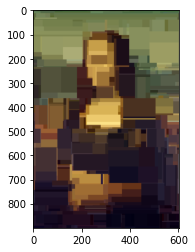

In [173]:
reg5 = RandomForestRegressor(n_estimators=1, max_depth=10)
reg5.fit(train_coord, train_color)
pred_color5 = reg5.predict(test_coord)
pred_color5 = pred_color5.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_color5)

<b>i: For 1 decsion tree, let max_depth = 15 </b>

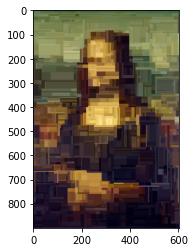

In [174]:
reg6 = RandomForestRegressor(n_estimators=1, max_depth=15)
reg6.fit(train_coord, train_color)
pred_color6 = reg6.predict(test_coord)
pred_color6 = pred_color6.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_color6)

In [ ]:
#From our above 6 image approximation, it is obvious to tell that for a certain number of decision trees, 
#the larger the depth is, the accurater the image approximation is.
#In general, the deeper the decison tree is, the more complex the model develope into. Thus, the model generates
#more splits and captures more information about the data. However, this might engender more chances of overfitting


<b> ii: when max_depth = 7, there is only 1 decision tree </b>

Text(0.5, 1.0, 'approximation while max_depth=7, n_estimator =1')

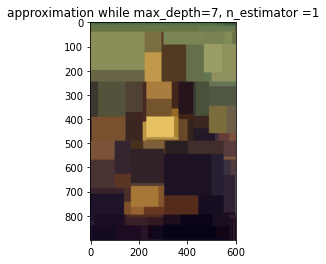

In [182]:
reg_1 = RandomForestRegressor(n_estimators=1, max_depth=7)
reg_1.fit(train_coord, train_color)
pred_1 = reg_1.predict(test_coord)
pred_1 = pred_1.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_1)
plt.title('approximation while max_depth=7, n_estimator =1')

<b>ii: when max_depth =7, there are 3 decision trees</b>

Text(0.5, 1.0, 'approximation while max_depth=7, n_estimator =3')

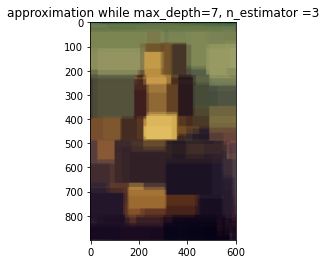

In [177]:
reg_2 = RandomForestRegressor(n_estimators=3, max_depth=7)
reg_2.fit(train_coord, train_color)
pred_2 = reg_2.predict(test_coord)
pred_2 = pred_2.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_2)
plt.title('approximation while max_depth=7, n_estimator =3')

<b>ii: when max_depth =7, there are 5 decision trees</b>

Text(0.5, 1.0, 'approximation while max_depth=7, n_estimator =5')

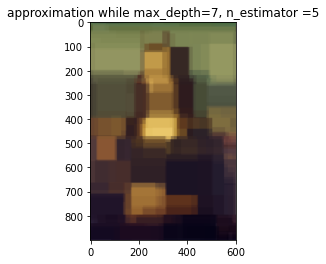

In [178]:
reg_3 = RandomForestRegressor(n_estimators=5, max_depth=7)
reg_3.fit(train_coord, train_color)
pred_3 = reg_3.predict(test_coord)
pred_3 = pred_3.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_3)
plt.title('approximation while max_depth=7, n_estimator =5')

<b> ii: when max_depth=7, there are 10 decision trees </b>

Text(0.5, 1.0, 'approximation while max_depth=7, n_estimator = 10')

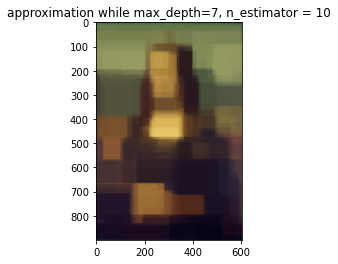

In [179]:
reg_4 = RandomForestRegressor(n_estimators=10, max_depth=7)
reg_4.fit(train_coord, train_color)
pred_4 = reg_4.predict(test_coord)
pred_4 = pred_4.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_4)
plt.title('approximation while max_depth=7, n_estimator = 10')

<b>ii: when max_depth=7, there are 100 decision trees</b>

Text(0.5, 1.0, 'approximation while max_depth=7, n_estimator = 100')

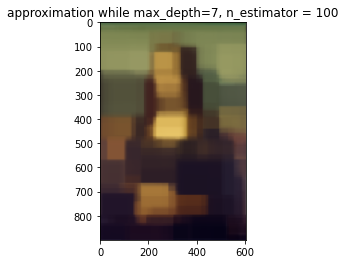

In [183]:
reg_5 = RandomForestRegressor(n_estimators=100, max_depth=7)
reg_5.fit(train_coord, train_color)
pred_5 = reg_5.predict(test_coord)
pred_5 = pred_5.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_5)
plt.title('approximation while max_depth=7, n_estimator = 100')

In [ ]:
#Fix the number of max_depth of a decion tree, when there is only 1 decision tree, the image apporximation is the
# most vague one among all the image approximations. However, there is no obvious different among 3,5,10,and 100
# decision trees while we fix the max_depth at 7. In general, as the number of decision trees in a forest increases,
# the better the result gets. However, after some points, adding additional decision trees do not improve the model.
#This is why for n_estimator = 3,5,10 and 100, we cannot tell much differences from the image approximations

<b> iii: K-NN=1 </b>

In [184]:
from sklearn.neighbors import KNeighborsRegressor

Text(0.5, 1.0, 'image approximation while K_NN =1')

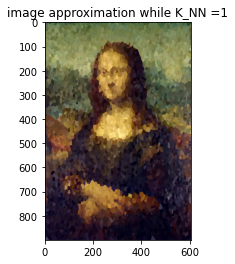

In [186]:
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(train_coord, train_color)
pred_KNN = neigh.predict(test_coord)
pred_KNN = pred_KNN.reshape(img.size[1],img.size[0],3)
plt.imshow(pred_KNN)
plt.title('image approximation while K_NN =1')

In [ ]:
#As we can tell from i, ii, and iii, K-NN with K=1 generates the best image approximation.
#Since each pixel should be most similar to its nearby pixel, k-NN with K=1 generates the best result. 

<b> iv </b>

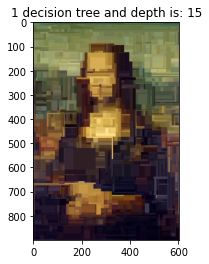

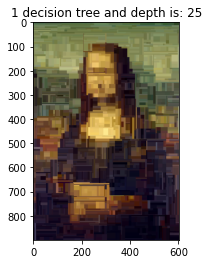

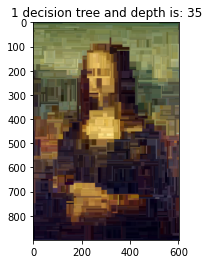

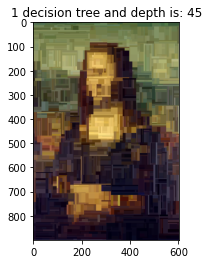

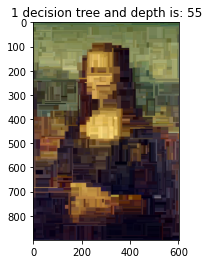

In [206]:
depth = [15,25,35,45,55]

for i, dept in enumerate(depth):
    reg = RandomForestRegressor(n_estimators=1, max_depth=dept)
    reg.fit(train_coord, train_color)
    pred = reg.predict(test_coord)
    pred = pred.reshape(img.size[1],img.size[0],3)
    plt.figure(i)
    plt.imshow(pred)
    plt.title('1 decision tree and depth is: '+ str(dept))
    #plt.title('approximation while max_depth=, n_estimator = 100')
    



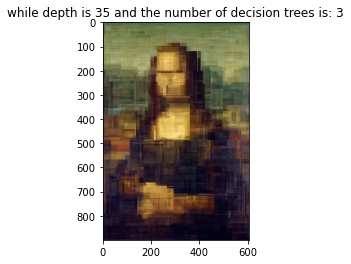

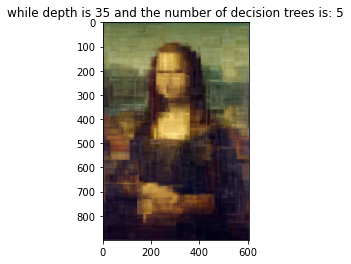

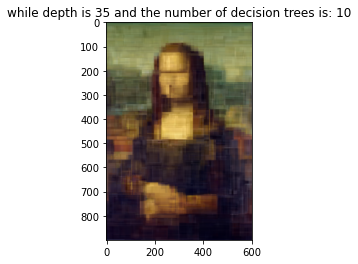

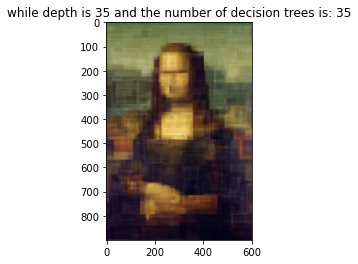

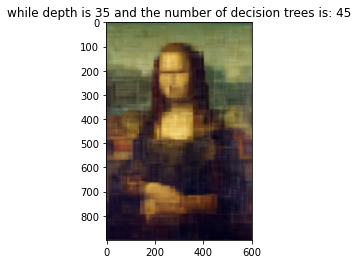

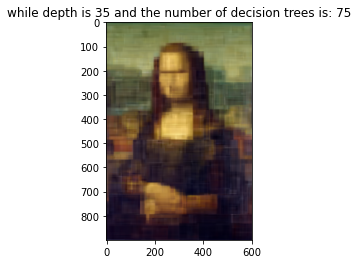

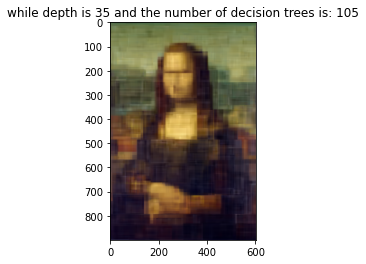

In [221]:
tree_num = [3, 5, 10, 35, 45, 75, 105]
for i, tree in enumerate(tree_num):
    reg = RandomForestRegressor(n_estimators=tree, max_depth= 35)
    reg.fit(train_coord, train_color)
    pred = reg.predict(test_coord)
    pred = pred.reshape(img.size[1],img.size[0],3)
    plt.figure(i)
    plt.imshow(pred)
    plt.title('while depth is 35 and the number of decision trees is: '+ str(tree))
    
    

In [ ]:
# Let fix the number of decision tree at 1 at first, we can tell that after max_depth is 35, the clarity of the image 
#approximation does not increase much. Thus, we can fix the max_depth and 35 and then try to find the number of decision
#trees, which can refine the clarity of the image approximation. We can tell that when there are 35 decision trees in our
#random forest, the clarity of the image approximation does not improve much.

<b>F: Analysis </b>

<b> i: What we want to predict is the (r,g,b) for the next pixel in the image. Let X->{true, false} is
    a partion of the feature space into the two disjoint regions and suppose we have a value M from the training set.
    if x_feature > M, next_rgb = node1_rgb, else: next_rgb = node2_rgb.
    

<b>ii: We can tell that the image approximation has layers and the shape of layers is rectangular. 
    Since our decision tree is based on x,y coordinates, it splits by differentiating coordinates.
    The patches of color are in the shape of rectangular and they are arranged to form layers.
    

<b> iii: Suppose we make d decisions for a single decison tree, thus, the depth of the decision tree is d. We will have
    at most 2^d nodes in the decision tree: the number of color pathces is 2^d

<b> iiii: suppose for each decision tree i, i= 1,2,3,...n, each tree has k_i nodes, then we at most have  $\prod_{i=1}^{n} k_i$ 
    